<a href="https://colab.research.google.com/github/D-Beall/MachineLearning/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering + PCA

## Setup and data visualization.

In [ ]:
from sklearn.model_selection import train_test_split #Train and test split library
from sklearn.cluster import KMeans 
import matplotlib
import matplotlib.pyplot as plt #Plotting Library
import numpy as np #Data manipulation/linear algebra
import pandas as pd #To read in data.

In [ ]:
human = pd.read_csv('./drive/My Drive/Machine Learning/Project 3/human_train.csv')
human_test = pd.read_csv('./drive/My Drive/Machine Learning/Project 3/human_test.csv')

In [ ]:
human_test = human_test.drop(['rn'],axis=1) #Remove non useful features(rn and activity)

In [ ]:
labels = human["activity"] #get labels of training data.
pos_labels = labels.unique().tolist()
human = human.drop(['rn','activity'],axis=1) #Remove non useful features(rn and activity)
features = list(human.columns) #grab all remaining feature names.

In [ ]:
print(pos_labels)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [ ]:
print(len(features))

561


As seen above this data set contains a large amount of features, visualizing all would be time consuming and probably not very informative.

Thus, PCA is very helpful for this situation. Next PCA will be used to determine the relevant features/create more useful ones.

Below we will check the intertia for each number of clusters regarding this dataset. This code is taken from the document linked to this section of the project.

In [ ]:
x = np.array(human)

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(x)
    inertias.append(model.inertia_)

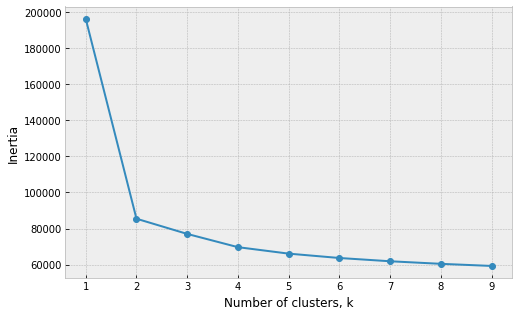

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

It appears the minimum optimal number of clusters is 2. This is due to the diminishing returns from the increased number of clusters after 2. 

For this part of the project, the notion of 6 cluster kmeans model will be explored. The reason for this is to see if the kmeans model is capable of clustering the 6 activities provided by the dataset. 

## Algorithm Creation Without PCA

In this section the data will be executed on a kmeans model with 6 clusters. PCA will not be utilized in this section and the results of the training will be discussed. 

### Helper Functions for visualizing and organizing results of kmeans model.

In [ ]:
def trained_comparision(trained,actual):
  '''
  trained- cluster indexs from trained kmeans model.
  actual- actual labels from training data.

  output- print pandas dataframe on which labels made which cluster.
  '''
  indexes = {'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5}
  res = np.zeros((6,6))
  for i in range(len(trained)):
    act_label = actual[i]
    train_label = trained[i]
    res[train_label][indexes[act_label]]+=1
  res = pd.DataFrame(data=res)
  res.columns = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
  print(res)


###Kmeans clustering

In [ ]:
x = np.array(human)
y = np.array(labels)

In [ ]:
print(x.shape)
print(y.shape)

(3609, 561)
(3609,)


In [ ]:
kmeans = KMeans(n_clusters=6,random_state=66).fit(x)#setup and fit model to training data.
trained_labels = kmeans.labels_ #get labels of each point from kmeans model
trained_centers = kmeans.cluster_centers_

In [ ]:
print(trained_labels[0:3])
print(trained_centers[0:3])

[3 3 3]
[[ 0.26734863 -0.02171357 -0.11624781 ... -0.70449625  0.23570021
   0.08331586]
 [ 0.26377968 -0.00627382 -0.09536101 ... -0.50957862  0.03352182
  -0.09808823]
 [ 0.27508871 -0.01733588 -0.10870919 ...  0.50319    -0.46127452
  -0.40623685]]


In [ ]:
x_test = np.array(human_test)

In [ ]:
print(x_test.shape)

(1541, 561)


In [ ]:
predicted_labels = kmeans.predict(x_test) #Labels predicted by kmeans model.

In [ ]:
trained_comparision(trained_labels, y)

   STANDING  SITTING  LAYING  WALKING  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
0       0.0      0.0     1.0    315.0                66.0             418.0
1     185.0    149.0    73.0      0.0                 0.0               0.0
2       0.0     13.0   607.0      0.0                 0.0               0.0
3     483.0    461.0     0.0      0.0                 0.0               0.0
4       0.0      0.0     0.0    256.0               319.0             117.0
5       0.0      0.0     0.0     32.0               108.0               6.0


Above is the data for which cluster the model placed each activity type. Overall this is pretty poor for the 6 activity types. This is evident because each activity is placed in at least 2 groups.

A bright spot in this result is that the model seems to be placing the non-walking activities in somewhat similar groups. The exception here being Laying. Similarly the Walking activities were all placed in the same 3 groups.

## Feature selection/PCA

This section PCA will be done along with the visualization of the 

In [ ]:
 from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=66)
pca.fit(x) #fit pca on training features

PCA(copy=True, iterated_power='auto', n_components=None, random_state=66,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_features = range(pca.n_components_)

Below we will visualize the most impactful pca features. The following graph code is taken from the assigned document for this section project.

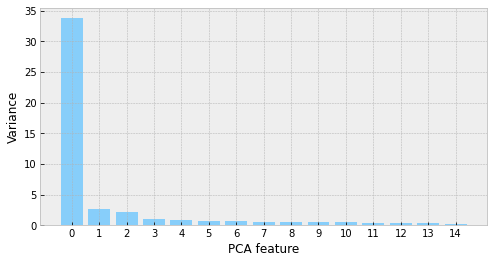

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(pca_features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(pca_features[:15])
plt.show()

This graphs showcases that one pca feature will be sufficient for the clustering needs of this model.

In [ ]:
pca=PCA(n_components=1,random_state=66)
pca_x = pca.fit_transform(x) #fit x to pca and create new x with new shape of observations x 1

In [ ]:
print(pca_x.shape)

(3609, 1)


With the new feature data, pca_x, it is time to run the kmeans clustering again with new feature data created from pca.

## Algorithm with PCA

In [ ]:
kmeans2 = KMeans(n_clusters=6,random_state=66).fit(pca_x)#setup and fit model to training data.
trained_labels2 = kmeans2.labels_ #get labels of each point from kmeans model
trained_centers2 = kmeans.cluster_centers_

In [ ]:
trained_comparision(trained_labels2, y)

   STANDING  SITTING  LAYING  WALKING  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
0     489.0    487.0   581.0      0.0                 0.0               0.0
1       0.0      0.0     0.0    251.0               123.0             224.0
2       1.0      1.0     1.0    187.0                29.0             237.0
3       0.0      0.0     0.0    146.0               241.0              76.0
4     178.0    135.0    99.0      0.0                 0.0               0.0
5       0.0      0.0     0.0     19.0               100.0               4.0


These results are intersting. The non-walking groups seemed to be more confident than the orginial model. However, the walking group is much different with more clusters being present in each activity. 

Overall, it appears that the data may not be suited for clustering into 6 groups. This is almost certainly due to the data between certain activities being too similar. Specifically, the walking and non-walking groups.

In [ ]:
trained_comparision(trained_labels, y)

   STANDING  SITTING  LAYING  WALKING  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
0       0.0      0.0     1.0    315.0                66.0             418.0
1     185.0    149.0    73.0      0.0                 0.0               0.0
2       0.0     13.0   607.0      0.0                 0.0               0.0
3     483.0    461.0     0.0      0.0                 0.0               0.0
4       0.0      0.0     0.0    256.0               319.0             117.0
5       0.0      0.0     0.0     32.0               108.0               6.0


#Random Forest, PCA, KNN comparision

##Setup and data visualization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt #Plotting Library
import numpy as np #Data manipulation/linear algebra
import pandas as pd #To read in data.
import seaborn as sb
from PIL import Image #To visualize digit images.
from random import randint
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

First to visualize the data, images of the digits will be displayed. Visualization code is heavily inspired by code of document linked to this part of the project.

In [ ]:
digits = pd.read_csv('./drive/My Drive/Machine Learning/Project 3/digit_train.csv')


In [ ]:
train = pd.read_csv('./drive/My Drive/Machine Learning/Project 3/digit_train.csv')
target = train["label"]
train = train.drop("label",1)

In [ ]:
digits.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7684,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23917,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23541,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18475,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8601,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = digits["label"]
digits = digits.drop(['label'],axis=1)

In [ ]:
digits = np.array(digits)

In [ ]:
print(y.shape)
print(digits.shape)

(42000,)
(42000, 784)


Populating the interactive namespace from numpy and matplotlib


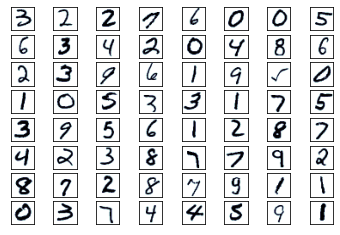

In [ ]:
%pylab inline
w, h = 28, 28
rand_images=[]
for i in range(0,64):
  rand_images.append(randint(0,len(digits)))
for x in range(0,len(rand_images)):
  subplot(8,8,x+1)
  data = np.reshape(digits[rand_images[x]][:],(28,28))
  plt.imshow(data,cmap="bone_r")
  xticks([])
  yticks([])

##Helper Functions

In [ ]:
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

##Random Forest

This section will contain the random forest implimentation for the digit dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits,y,test_size=0.15,random_state=66)#split data in test train sets.

In [ ]:
#Setup default model and fit on training data.
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predict values on test set.
y_predict = clf.predict(x_test)

In [ ]:
labs = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
cr = classification_report(y_test,y_predict,labels=labs)
cm = multilabel_confusion_matrix(y_test,y_predict,labels=labs)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       597
           1       0.99      0.99      0.99       677
           2       0.96      0.96      0.96       622
           3       0.96      0.95      0.96       650
           4       0.96      0.96      0.96       654
           5       0.95      0.96      0.95       548
           6       0.97      0.98      0.98       632
           7       0.97      0.97      0.97       660
           8       0.97      0.95      0.96       609
           9       0.94      0.94      0.94       651

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.97      0.97      0.97      6300



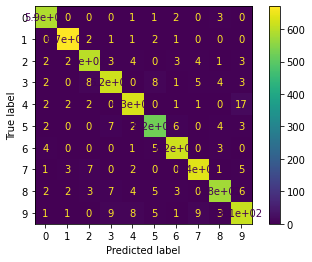

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

According to the classification report above this model is working with about .97 accuracy overall. The above "confusion matrix" shows that the model is very accurate with its predictions. Another note here is that with all default settings the model ran with 100 estimators. To see which amount of estimator would be best the model will be ran multiple times at each number of estimators. Then the accuracy will be averaged for each number of estimators and compared.

In [ ]:
n_estimators = [1,5,10,50,100,500,1000]
#n_estimators = [1,5]
samples = 10 #number of times to run each model.
accs = np.zeros(len(n_estimators))
sigma = np.zeros(len(n_estimators))
j=0
for n in n_estimators:
  local_scores = np.zeros(samples)
  for i in range(0,samples):
    clf = RandomForestClassifier(n_estimators = n, n_jobs=1, criterion="gini")#setup model params
    clf.fit(x_train[0:1000],y_train[0:1000])
    y_pred = clf.predict(x_test[0:1000])
    local_scores[i] = accuracy_score(y_test[0:1000],y_pred)
  accs[j]= mean(local_scores)
  sigma[j]= std(local_scores)

  j=j+1


##PCA and KNN

This section analyzes the features of this dataset, uses pca to reduce number of features, and uses KNN to evaluate such results.

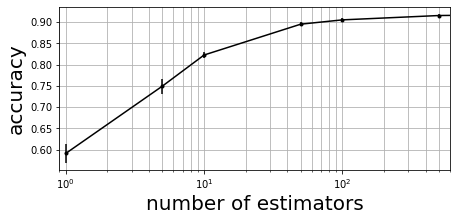

In [ ]:
figure(figsize(7,3))
errorbar(n_estimators, accs, yerr=sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 20)
ylabel("accuracy",size = 20)
xlim(0.9,600)
grid(which="both")

The above code and graph is heavily based on the relevant document for this section of the project. As seen in the graph the return on accuracy is greatly diminished after 50 tree models. Even increasing to 1000 trees compared to 100 yielded little in accuracy improvement.

The next step in this section is to analyze feature importance. First with the given features and then using pca to see how many pca features are necessary to cover most of the data.

Feature ranking:
1. feature 378 (0.010490)
2. feature 350 (0.009372)
3. feature 409 (0.007872)
4. feature 514 (0.007631)
5. feature 406 (0.007493)
6. feature 405 (0.007333)
7. feature 515 (0.007156)
8. feature 377 (0.007025)
9. feature 430 (0.006947)
10. feature 433 (0.006653)


Text(0, 0.5, 'importance')

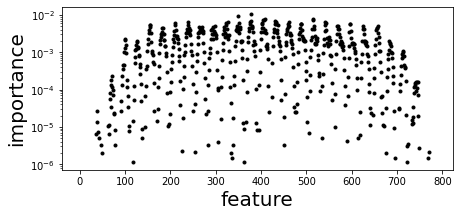

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)

While some features are more important than others, it doesn't appear there are a reasonable number of features that are the most important. Next PCA will be used to decide how many pca features should be used on this dataset. The above and below code come from the document provided for this project.

In [ ]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(x_train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1   

Text(0, 0.5, 'variance ratio')

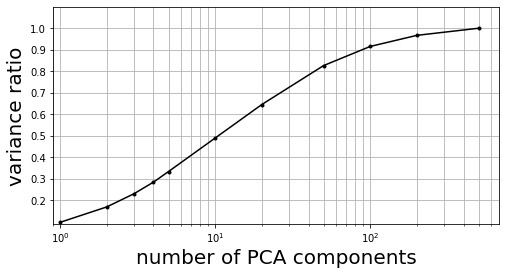

In [ ]:
figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(0.9)
grid(which="both")
xlabel("number of PCA components",size=20)
ylabel("variance ratio",size=20)

According to this data over 100 features are necessary to cover at least 90% of the data and its variance. With this in mind how many compoonents are necessary to have an accurate KNN model? It stands to reason that at least 100 pca features are necessary, but more may be required for higher accuracies.

In [ ]:
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:1000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
    i=i+1

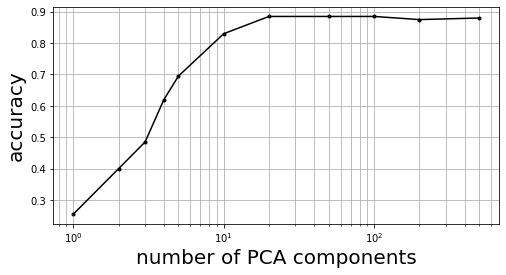

In [ ]:
figure(figsize(8,4))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

As suspected 100 pca features did provided a reasonably good accuracy. However, not until 200 features did the accuracy reach about 90%. 

Compared to the highest preforming of the random forest KNN does worse roughly 7% lower accuracy. This is not suprising, but does show the power of pca. Another interesting piece of this graph is the decrease of accuracy as the noumber of features exceeds 200. This is slightly strange because the model is now covering more varience of the data. 

The reason for this loss in accuracy could be the model overfitting to the data. This theory is more likely becuase of the limited data set of 1000 that the models are training on.